# Sentiment Analysis of Viewer Opinions on Star Wars Movies

In order to gain insight as to how fans rated each Star Wars movie, the team at FiveThirtyEight conducted a survey using the online tool SurveyMonkey. They received a total of 835 responses, which can be downloaded from their GitHub [repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

For this project, we'll be cleaning and exploring the above dataset.

## Reading in the Data

We'll start by reading the dataset into a pandas dataframe:

In [1]:
import numpy as np
import pandas as pd

star_wars = pd.read_csv('star_wars.csv', encoding = 'ISO-8859-1')

print(star_wars.shape)
star_wars.head(10)

(1187, 38)


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

`RespondentID` is supposed to be a unique ID for each respondent, but in some rows it's `NaN`. We'll thus remove any rows with an invalid `RespondentID`. 

In [2]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]

star_wars.shape

(1186, 38)

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,

Removing rows with an invalid `RespondentID` removed 1 row. Let's now look at the column names:

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Initial Data Cleaning

In [5]:
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))

print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


Right now, as we see just above, the '`Have you seen any of the 6 films in the Star Wars franchise?`' and '`Do you consider yourself to be a fan of the Star Wars film franchise?`' columns contain 'Yes' and 'No' values stored as strings, as well as 'NaN' values. It would be simpler to convert the 'Yes' and 'No' strings to boolean values of `True` and `False`.

We'll use the map function to rename the column values based off a dictionary.

In [6]:
yes_no = {
    'Yes': True,
    'No': False,
    True: True,
    False: False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = (
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no))

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = (
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no))

star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The next 6 columns (columns 3-8, inclusive) represent a single checkbox question, where the respondent was asked to check off a series of boxes in response to the question "Which of the following Star Wars films have you seen? Please select all that apply"

The columns of these questions are:

- `Which of the following Star Wars films have you seen? Please select all that apply.` - Whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`.
- `Unnamed: 4` - Whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`.
- `Unnamed: 5` - Whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`.
- `Unnamed: 6` - Whether or not the respondent saw `Star Wars: Episode IV A New Hope`.
- `Unnamed: 7` - Whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`.
- `Unnamed: 8` - Whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.

In these columns, a value corresponding to the name of the movie signifies a 'Yes'. NaN values mean the respondent either didn't see the movie, or didn't answer the question. We'll assume that they didn't see the movie.

We'll convert the values in this column to boolean values again, and we'll also rename the columns into something more suitable.

In [7]:
mapping_dict_2 = {
    True: True,
    False: False,
    np.nan: False
}

# Since we see the first row has all the movie names, we'll use that to
# quickly make a list of all the movie names:
movie_names = star_wars.iloc[0,3:9].tolist()

print(movie_names)
print('\n')
 
for each in movie_names:
    mapping_dict_2[each] = True
    
print(mapping_dict_2)

['Star Wars: Episode I  The Phantom Menace', 'Star Wars: Episode II  Attack of the Clones', 'Star Wars: Episode III  Revenge of the Sith', 'Star Wars: Episode IV  A New Hope', 'Star Wars: Episode V The Empire Strikes Back', 'Star Wars: Episode VI Return of the Jedi']


{False: False, True: True, 'Star Wars: Episode VI Return of the Jedi': True, 'Star Wars: Episode V The Empire Strikes Back': True, nan: False, 'Star Wars: Episode II  Attack of the Clones': True, 'Star Wars: Episode III  Revenge of the Sith': True, 'Star Wars: Episode IV  A New Hope': True, 'Star Wars: Episode I  The Phantom Menace': True}


With the dictionary made, we'll proceed to re-map the Boolean values into columns 3 to 8:

In [8]:
for each in star_wars.columns[3:9]:
    star_wars[each] = star_wars[each].map(mapping_dict_2)
    
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,False,True,False,False,False,False,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


We'll also rename the columns into something more appropriate.



In [9]:
renaming_cols =  {
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
}

star_wars.rename(renaming_cols, axis=1, inplace=True)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The next 6 columns (columns 9 to 14, inclusive) ask the respondents to rank the movies in order of least to most favorite, with '1' representing most, and '6' representing least favorite. 

Each of the columns has a value of either '1', '2', '3', '4', '5', '6', or 'NaN'. 


- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
- `Unnamed: 10` - How much the respondent liked `Star Wars: Episode II Attack of the Clones`
- `Unnamed: 11` - How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
- `Unnamed: 12` - How much the respondent liked `Star Wars: Episode IV A New Hope`
- `Unnamed: 13` - How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
- `Unnamed: 14` - How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

We'll be converting each column to a numeric type, and once again renaming the columns so we can see what they represent more easily. 

In [10]:
# Converting type to numeric:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Constructing list of new col names:
cols_9_14 = []

for i in range (1, 7):
    num = str(i)
    cols_9_14.append('ranking_' + num)

# Constructing dict to be used in renaming:
renaming_dict_2 = {}

for i in range (0,6):
    renaming_dict_2[star_wars.columns[9+i]] = cols_9_14[i]
    
star_wars.rename(renaming_dict_2, axis =1, inplace = True)

star_wars.head()
    

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Determining how each Movie ranks

With the ranking columns cleaned up, we're now able to determine the highest ranked movies more quickly. 

To accomplish this, we'll simply take the mean of each of the ranking columns using `df.mean()` method on our `star_wars` dataframe.

In [11]:
star_wars.loc[:,'ranking_1':'ranking_6'].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


We'll keep in mind that a score 1 represents that a movie was the most favorite, and a score of 6 means it was the least favorite. 

As such, the **lowest** mean score of each `ranking_x` column means that that movie was rated the most highly on average.

In [12]:
movie_score = star_wars.loc[:,'ranking_1':'ranking_6'].mean()

movie_score

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

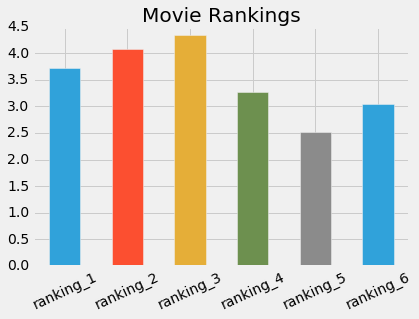

In [37]:
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')

movie_score.plot(kind='bar', rot=25, title = "Movie Rankings")

The number in `ranking_1`, `ranking_2`, etc, correspond to the Star Wars episode.

Once again, keep in mind that **a lower mean score translates to a higher average rating**.

In general, it certainly seems like the original movies were more favorably rated. "The Empire Strikes Back" was the most highly rated with a mean score of 2.5, which means on average, most respondents rated it either their 1st or 2nd most favorite Star Wars movie. 

# Determining viewership of each movie

Earlier, we cleaned up the `seen` columns (which indicated whether the respondent had seen the corresponding movie), and converted their values to Boolean values. 

The `mean()` and `sum()` functions treat Boolean values as integers when applied on columns in dataframes, which means we're able to add the number of people who saw each movie by summing up a column.

In [14]:
viewership = star_wars.loc[:,'seen_1':'seen_6'].sum()

viewership

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

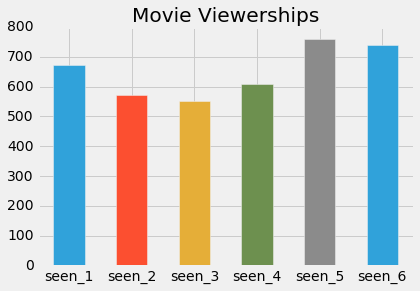

In [38]:
viewership.plot(kind='bar', rot=0, title = "Movie Viewerships")

In general there's an undeniable correlation between viewership and a movie's rank. 

The original movies were the most viewed ones, and the fifth movie, "The Empire Strikes Back" was the most viewed, just as it was the most highly rated.

**However, this does also call attention to a flaw in the methodology we've been using: Respondents have been rating movies that they simply haven't seen.** It might have produced us a more accurate result if we only looked at respondent's rankings who've seen all 6 movies. Because "The Empire Strikes Back" was seen by the most people, it stands to reason that it achieved the highest average rating because there were more people who had seen it, who were thus able to better consider whether to give it a high rating.

We'll thus attempt to calculate the average ratings again among only people who had seen all 6 movies.

## Reaffirming movie Ratings among only viewers who saw all 6 movies.

In [16]:
# Creating new column that counts no. of movies seen

star_wars['movies_seen'] = star_wars.loc[:,'seen_1':'seen_6'].sum(axis=1)

star_wars['movies_seen'].value_counts()

6    471
0    351
3     99
2     85
4     72
1     56
5     52
Name: movies_seen, dtype: int64

471 people definitively indicated that they saw all 6 movies. This is a fairly good sample size to work with.

In [17]:
seen_all = star_wars[star_wars['movies_seen'] == 6]

seen_all.shape

(471, 39)

In [18]:
ratings2 = seen_all.loc[:,'ranking_1':'ranking_6'].mean()

ratings2

ranking_1    4.237792
ranking_2    4.326964
ranking_3    4.253191
ranking_4    2.866242
ranking_5    2.380042
ranking_6    2.932059
dtype: float64

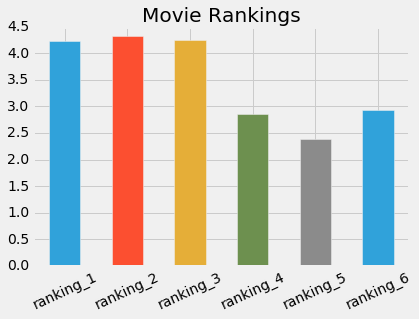

In [41]:
ratings2.plot(kind='bar', rot =25, title = "Movie Rankings")

When we narrow down the respondents and consider only the opinions of those who had seen all 6 movies, we observe much of the same results that we did before narrowing down the dataframe.

Movie 5, "The Empire Strikes Back" is rated the most highly. Once again, the original movies were rated a lot better. The sequel movies were rated even more poorly than they were earlier when we included in all respondents, which makes sense.

This confirms our views that among both ardent fans and everyday viewers, the original movies are seen more favorably, with "The Empire Strikes Back" standing out as the most highly rated one.

# Splitting the `star_wars` dataframe by demographics

We'll now examine how certain segments of the survey population responded. There are a number of columns that segment our data into 2 groups, a few examples being:


- `Do you consider yourself to be a fan of the Star Wars film franchise?` - `True` or `False`
- `Gender` - `Male` or `Female`

Splitting into subsets based on these binary groups allows us to compute the most viewed and highest-ranked movies separately for each group.

### Splitting by Gender

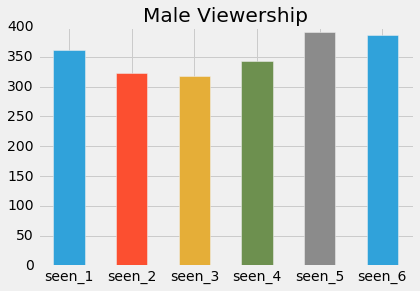

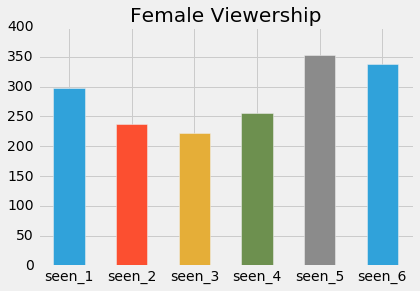

In [31]:
import matplotlib.pyplot as plt

males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

males_viewing = males.loc[:,'seen_1':'seen_6'].sum()
females_viewing = females.loc[:,'seen_1':'seen_6'].sum()

males_viewing.plot(kind='bar', title = 'Male Viewership', rot =0)
plt.show()
females_viewing.plot(kind='bar', title = 'Female Viewership', rot=0)
plt.show()

Overall, while male and female viewerships follow similar trends, there tend to be more male than female viewers.

Let's look at ratings:

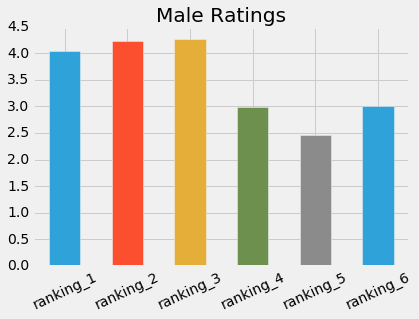

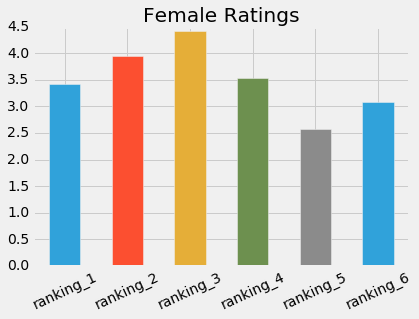

In [34]:
males_rating = males.loc[:,'ranking_1':'ranking_6'].mean()
females_rating = females.loc[:,'ranking_1':'ranking_6'].mean()

males_rating.plot(kind='bar', title = 'Male Ratings',rot=25)
plt.show()
females_rating.plot(kind='bar', title = 'Female Ratings',rot=25)
plt.show()

Once again, males and females follow similar rating trends, although male viewers seem slightly harsher on the sequel movies.

### Splitting by "true fans"

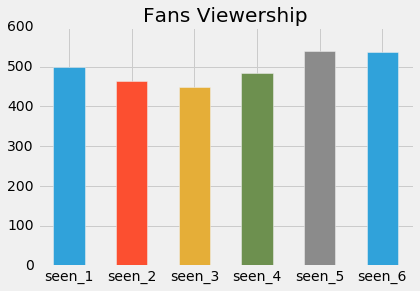

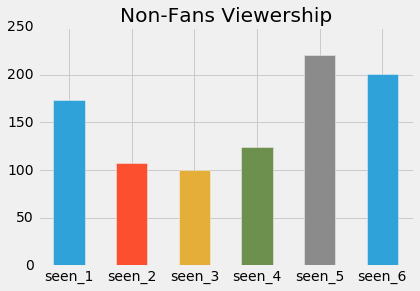

In [35]:
true_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
not_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

fans_viewing = true_fans.loc[:,'seen_1':'seen_6'].sum()
notfans_viewing = not_fans.loc[:,'seen_1':'seen_6'].sum()

fans_viewing.plot(kind='bar', title = 'Fans Viewership',rot=0)
plt.show()
notfans_viewing.plot(kind='bar', title = 'Non-Fans Viewership',rot=0)
plt.show()

For viewership numbers between self-described fans and non-fans, the results are very predictable.

**While fans tend to have watched the original movies more, they're also more likely to have seen all 6 movies.** For instance, the difference between the most viewed and least viewed movies by fans is only around 15-20%.

In contrast, among non-fans while on average the original movies were seen more, non-fans are a lot more likely not to have seen one or more of the 6 movies. For instance, the difference between the most viewed and least viewed movies by non-fans is nearly 60%.

Let's look at ratings next.

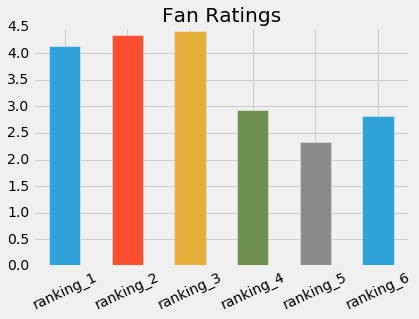

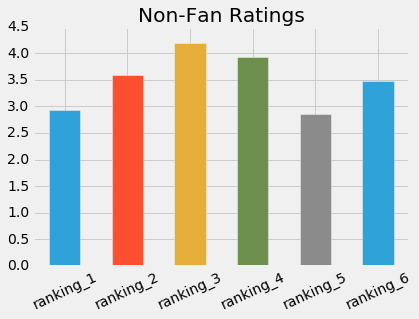

In [36]:
fans_rating = true_fans.loc[:,'ranking_1':'ranking_6'].mean()
notfans_rating = not_fans.loc[:,'ranking_1':'ranking_6'].mean()

fans_rating.plot(kind='bar', title = 'Fan Ratings',rot=25)
plt.show()
notfans_rating.plot(kind='bar', title = 'Non-Fan Ratings',rot=25)
plt.show()

Again, somewhat predictably, fans were more zealous in their love of the original movies, whereas non-fans were more likely to give favorable reviews to the sequel movies.

Among non-fans, movie 1 and movie 5 are rated almost equally high, which is an interesting observation. Among fans on the other hand, all 3 originals were rated the highest by a margin.